# <span style="color:red">1. Solution</span>

## Portfolio Management
### MLP Training

#### January 2025

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu

***

# 1. Risk

### 1. 
Suppose you are a large asset manager, running many strategies.

A new strategy is proposed for your investment. Which performance metrics would be most influential to you as you decide on an allocation?


### 2.
Consider the data in `data/assignment_1_data.xlsx`. For each stock, calculate the (annualized)
* mean
* vol
* sharpe

Calculate those same statistics for...
* equally-weighted portfolio of the stocks
* equallly-weighted portfolio excluding `XOM`.


### 3.
Use the data in `data/multi_asset_etf_data.xlsx`. Make scatter plots where in each plot the vertical axis displays mean return. The horizontal axis displays different measures of risk...
* volatility
* skewness
* kurtosis
* 5th quantile return
* max drawdown

Do any of these scatterplots show strong evidence of a relationship between risk and return?

***

### **<span style="color:red">1.1.</span>**

Some metrics are useful for measuring **stand-alone** performance...
* mean
* volatility
* drawdown

However, much more important would be metrics that measure how the fund's performance would impact a broader portfolio. These **marginal** performance statistics include...

* correlation
* alpha
* beta
* information ratio

### **<span style="color:red">1.2.</span>**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import sys
sys.path.insert(0, '../cmds')
from portfolio import performanceMetrics, maximumDrawdown

In [7]:
INFILE = "../data/assignment_1_data.xlsx"
FREQ = 52

info = pd.read_excel(INFILE,sheet_name='info').set_index('ticker')
info

In [11]:
retsx = pd.read_excel(INFILE,sheet_name='excess returns').set_index('date')

port = retsx.mean(axis=1).to_frame().rename(columns={0:'equally-weighted'})

TICK_EX = 'XOM'
port[f'exclude {TICK_EX}'] = retsx.drop(columns=[TICK_EX]).mean(axis=1).to_frame().rename(columns={0:'equally-weighted'})

retsx_all = pd.concat([port,retsx],axis=1)

In [12]:
performanceMetrics(retsx_all,annualization=FREQ)

,Mean,Vol,Sharpe,Min,Max
equally-weighted,0.328080,0.253437,1.294523,-0.153175,0.112467
exclude XOM,0.367068,0.276539,1.327365,-0.152638,0.124607
AAPL,0.264010,0.281820,0.936802,-0.190553,0.143572
MSFT,0.273016,0.245809,1.110681,-0.155696,0.153519
AMZN,0.302677,0.308214,0.982034,-0.151901,0.188375
NVDA,0.678099,0.456552,1.485262,-0.210209,0.332546
GOOGL,0.232592,0.287975,0.807680,-0.135546,0.254033
TSLA,0.452013,0.584168,0.773773,-0.284958,0.334896
XOM,0.094151,0.296208,0.317856,-0.175337,0.184175


The performance is substantially better for the equally-weighted portfolio than for any single stock, except `NVDA`.

Excluding `XOM` reduces diversification, but in this case it still leads to a beter portfolio given that `XOM` had a much worse mean and Sharpe ratio than any other investment.

### **<span style="color:red">1.3.</span>**

None of the metrics show a strong proportional relationship to historic mean return.

This could indicate that...
* historic mean or historic risk are not good indicators of the future.
* there is some other risk metric which corresponds better to mean returns.
* markets do not efficiently price risk: perhaps is no clear relationship between risk and return.

We will see further evidence for the first and second ideas in other discussions.

In [14]:
INFILE = "../data/multi_asset_etf_data.xlsx"
FREQ = 12

info = pd.read_excel(INFILE,sheet_name='descriptions').set_index('ticker')
info

,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
ticker,,,,,,
SPY,SPDR S&P 500,ETF,USD,25604208,627773800448,The Trust seeks to achieve its investment obje...
EFA,iShares MSCI EAFE ETF,ETF,USD,10653257,54985711616,The fund generally will invest at least 80% of...
EEM,iShares MSCI Emerging Index Fun,ETF,USD,17962107,17468592128,The fund generally will invest at least 80% of...
PSP,Invesco Global Listed Private E,ETF,USD,8928,277930496,The fund generally will invest at least 90% of...
QAI,NYLI Hedge Multi-Strategy Track,ETF,USD,49257,637390272,"The fund is a ""fund of funds"" which means it i..."
HYG,iShares iBoxx $ High Yield Corp,ETF,USD,22374708,15881510912,The underlying index is a rules-based index co...
DBC,Invesco DB Commodity Index Trac,ETF,USD,478168,1387142912,The fund pursues its investment objective by i...
IYR,iShares U.S. Real Estate ETF,ETF,USD,2699001,4990495744,The fund seeks to track the investment results...
IEF,iShares 7-10 Year Treasury Bond,ETF,USD,2340833,32854654976,The underlying index measures the performance ...


In [15]:
USE_EXCESS = False

if USE_EXCESS:
    SHEET = 'excess returns'
else:
    SHEET = 'total returns'
    
rets = pd.read_excel(INFILE,sheet_name=SHEET).set_index('Date')

In [22]:
QUANTILE = .05

stats = pd.DataFrame(index=rets.columns,columns=['mean','vol','skewness','kurtosis','quantile','max drawdown'],dtype=float)
stats['mean'] = rets.mean() * FREQ
stats['vol'] = rets.std() * np.sqrt(FREQ)
stats['skewness'] = rets.skew()
stats['kurtosis'] = rets.kurtosis()
stats['quantile'] = rets.quantile(QUANTILE)
stats['max drawdown'] = maximumDrawdown(rets)['Max Drawdown']

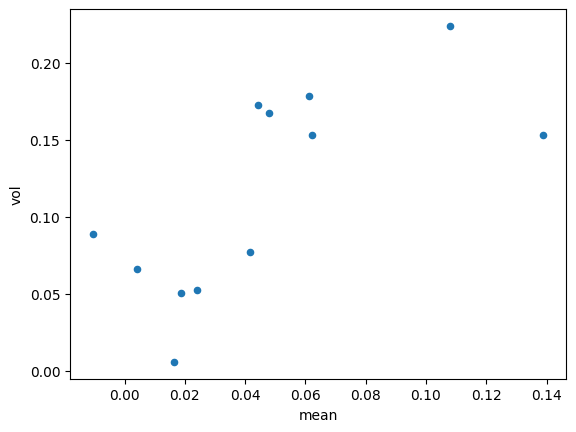

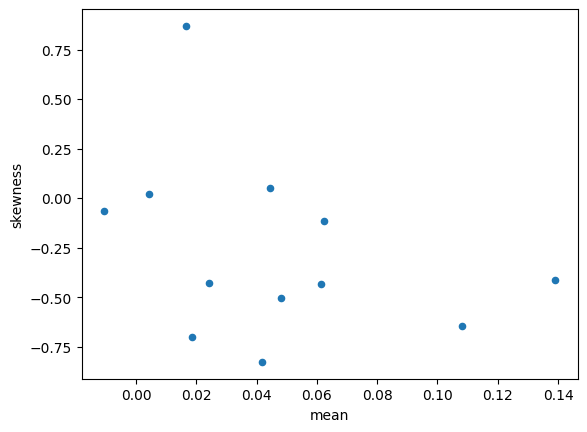

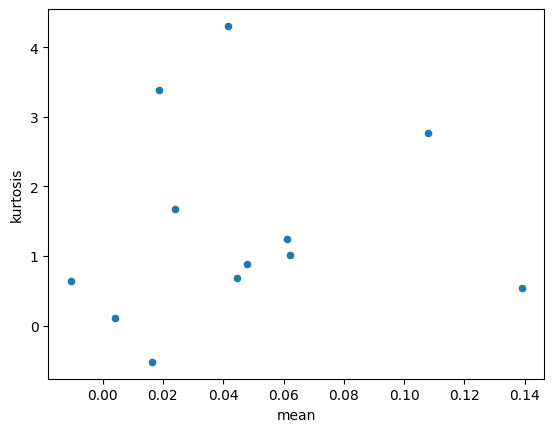

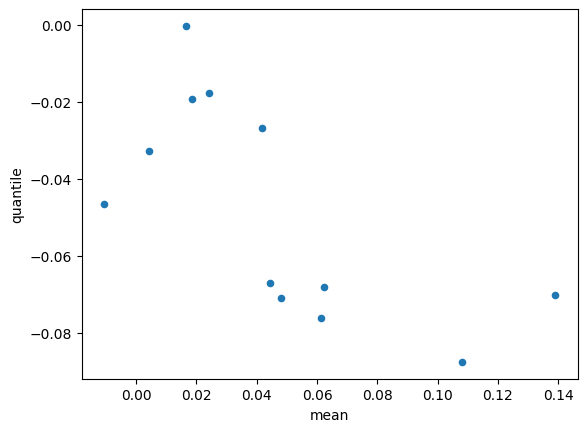

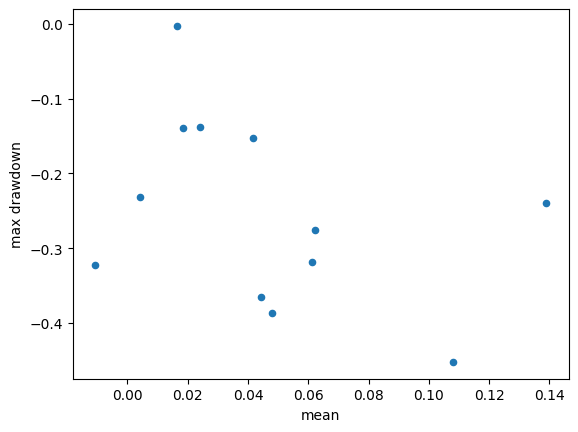

In [24]:
for col in stats.columns[1:]:
    stats.plot.scatter(x='mean',y=col)